In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandahouse as ph
import datetime
from datetime import timedelta
from operator import attrgetter
%matplotlib inline

In [2]:
customers = pd.read_csv ('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-chernobrivets/olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**customer_id** — позаказный идентификатор пользователя

**customer_unique_id** —  уникальный идентификатор пользователя  (в идеальных данных не может быть двух пользователей с одинаковым значением, является уникальным айдишником пользователя)

**customer_zip_code_prefix** —  почтовый индекс пользователя

**customer_city** —  город доставки пользователя

**customer_state** —  штат доставки пользователя

In [3]:
# Основная информации о датасете
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
# Проверка пропусков
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [5]:
# Проверка повторяющихся значений
customers.duplicated().sum()

0

In [6]:
orders = pd.read_csv ('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-chernobrivets/olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])
orders.head()
# Сразу переведем колонки с датой в соответствующий тип данных datetime

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**order_id** —  уникальный идентификатор заказа (номер чека)

**order_item_id** —  идентификатор товара внутри одного заказа (не содержит информацию о количестве товаров)

**product_id** —  уникальный идентефикатор товара (аналог штрихкода)

**seller_id** — уникальный идентефикатор производителя товара

**shipping_limit_date** —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

**price** —  цена за единицу товара

**freight_value** —  вес товара

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [8]:
# Проверка пропусков
orders.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [9]:
# Проверка повторяющихся значений
orders.duplicated().sum()

0

In [10]:
items = pd.read_csv ('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-chernobrivets/olist_orders_dataset.csv')

for col in ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']:
     items[col] = pd.to_datetime(items[col])
        
items.head()
# Сразу переведем колонки с датой в соответствующий тип данных datetime

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


**order_id** —  уникальный идентификатор заказа (номер чека)

**customer_id** —  позаказный идентификатор пользователя

**order_status** —  статус заказа

**order_purchase_timestamp** —  время создания заказа

**order_approved_at** —  время подтверждения оплаты заказа

**order_delivered_carrier_date** —  время передачи заказа в логистическую службу

**order_delivered_customer_date** —  время доставки заказа

**order_estimated_delivery_date** —  обещанная дата доставки

Статусы заказа:

created —  создан

approved —  подтверждён

invoiced —  выставлен счёт

processing —  в процессе сборки заказа

shipped —  отгружен со склада

delivered —  доставлен пользователю

unavailable —  недоступен

canceled —  отменён

In [11]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [12]:
# Проверка пропусков
items.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
# Проверка повторяющихся значений
items.duplicated().sum()

0

## 1. Сколько у нас пользователей, которые совершили покупку только один раз?

Для нашего решения, произведенная покупка - это статус delivered и время подтверждения оплаты order_approved_at из таблицы items, потому что на остальных этапах есть возможность отказаться от товара по любым причинам (например, передумал), а при статусе delivered товар может быть возвращен только из-за нарушения упаковки или не надлежащего вида изделия. Если коротко, то:

**Потребитель получил товар, продавец получил деньги.**

Узнаем кол-во покупотелей, совершивших только 1 покупку (иммеющих статус заказа delivered)

In [14]:
# Проверим общее количество уникальных покупателей
customers.customer_unique_id.nunique()

96096

In [15]:
# Теперь необходимо проверить, есть ли отличия в уникальности пользователей 2-х таблиц customers и items
print(customers.customer_id.nunique())
print(items.customer_id.nunique())
# Проверим общее количество уникальных идентификаторов заказа (номер чека)
items.order_id.nunique()

99441
99441


99441

In [16]:
# Соеденим customers и items
customers_items = customers.merge(items)
customers_items.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [17]:
# Проверяем, есть ли изменения
print(customers_items.customer_unique_id.nunique())
print(customers_items.customer_id.nunique())
print(customers_items.order_id.nunique())

96096
99441
99441


In [18]:
customers_items.loc[customers_items.order_approved_at.notna()]\
                                   .query('order_status == "delivered"')\
                                   .groupby('customer_unique_id', as_index=False)\
                                   .agg({'order_id':'nunique'})\
                                   .query('order_id == 1')\
                                   .count()[0]
#1. Исключаем неоплаченные заказы
#2. Заказ доставлен
#3. Группируем по уникальному id
#4. Считаем уникальных заказов
#5. Был сделан только 1 заказ
#6. Кол-во пользователей (для минимализма)

90545

 **Ответ: 90545 пользователей совершили покупку 1 раз**

## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Будем использовать метод resample. Для этого еще раз проверим типы данных в нашем датафрейме и переведем колонку подтверждения оплаты (order_purchase_timestamp) в индекс.

In [19]:
customers_items.dtypes
# Колонки с указанием даты и времени переведены в необходимые типы данных

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [20]:
# Переведем колнку в индекс
customers_items = customers_items.set_index('order_purchase_timestamp')

In [21]:
delivered_orders = customers_items.loc[customers_items.order_delivered_customer_date.notna()]\
                                  .query('order_status == "delivered"')\
                                  .resample(rule='M')\
                                  .order_id.count().reset_index()\
                                  .rename(columns={'order_purchase_timestamp':'month','order_id':'value_delivered_orders'})

# 1. Отобрали только те заказы, которые были доставлены
# 2. Перевели временные данные к концу месяца (чтобы перед глазами было видно количество дней в месяце)
# 3. Посчитали количество заказов (применили reset_index для возможности переименования колонок)
# 4. Для удобства чтения переименовали колонки

In [22]:
# Проверим себя. Если есть время доставки, то и статус заказа должен быть 'delivered'

customers_items.loc[customers_items.order_delivered_customer_date.notna()]\
               .query('order_status == "delivered"')\
               .order_status.value_counts()

# Есть одно замечание. Доп. фильтрация по статусу 'delivered' не показывает отмененные заказы (статус 'canceled').
# Статус 'canceled' вполне вероятен, потому что от товара могли отказаться после получения.

delivered    96470
Name: order_status, dtype: int64

In [23]:
# найдем количество не доставленных товаров

not_delivered_orders = customers_items.loc[customers_items.order_delivered_customer_date.isna()]\
                                  .query('order_status != "delivered"')\
                                  .resample(rule='M')\
                                  .order_id.count().reset_index()\
                                  .rename(columns={'order_purchase_timestamp':'month','order_id':'value_not_delivered_orders'})

# Отобрали только те заказы, которые не были доставлены
# Повторили действия из предыдущего шага, изменив название количетва не доставленных заказов

In [24]:
# Снова проверим себя. Исходя из нашего фильтра, у нас не должно быть заказов со статусом 'delivered'

customers_items.loc[customers_items.order_delivered_customer_date.isna()]\
               .query('order_status != "delivered"')\
               .order_status.value_counts()

# Но он почему-то есть (если не фильтровать order_status != "delivered"), нужно разобраться, почему?
# Возможно это просто техническая ошибка и товары на самом деле доставлены.
# Мы тоже будем считать, что товары доставлены.

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
created           5
approved          2
Name: order_status, dtype: int64

In [25]:
not_delivered_orders.value_not_delivered_orders.mean()

113.73076923076923

**Ответ: 113.73076923076923 заказов в месяц в среднем не доставляется по разным причинам**

Выведем детализацию по причинам 

In [26]:
not_delivered_by_month = customers_items.loc[customers_items.order_delivered_customer_date.isna()]\
                                        .query('order_status != "delivered"')\
                                        .resample(rule='M')\
                                        .order_status.value_counts()\
                                        .to_frame()\
                                        .rename(columns={'order_status':'value'})\
                                        .reset_index()\
                                        .rename(columns={'order_purchase_timestamp':'month'}) 

# Выбираем не доставленные заказы
# Переводим дату доставки в месяца и переименовываем столбец
# Считаем количество заказов для каждого статуса и переименовываем столбец
# Сбрасываем индексы

not_delivered_by_month

,month,order_status,value
0,2016-09-30,canceled,2
1,2016-09-30,shipped,1
2,2016-10-31,canceled,19
3,2016-10-31,invoiced,18
4,2016-10-31,shipped,8
...,...,...,...
108,2018-08-31,invoiced,23
109,2018-08-31,unavailable,7
110,2018-09-30,canceled,15
111,2018-09-30,shipped,1


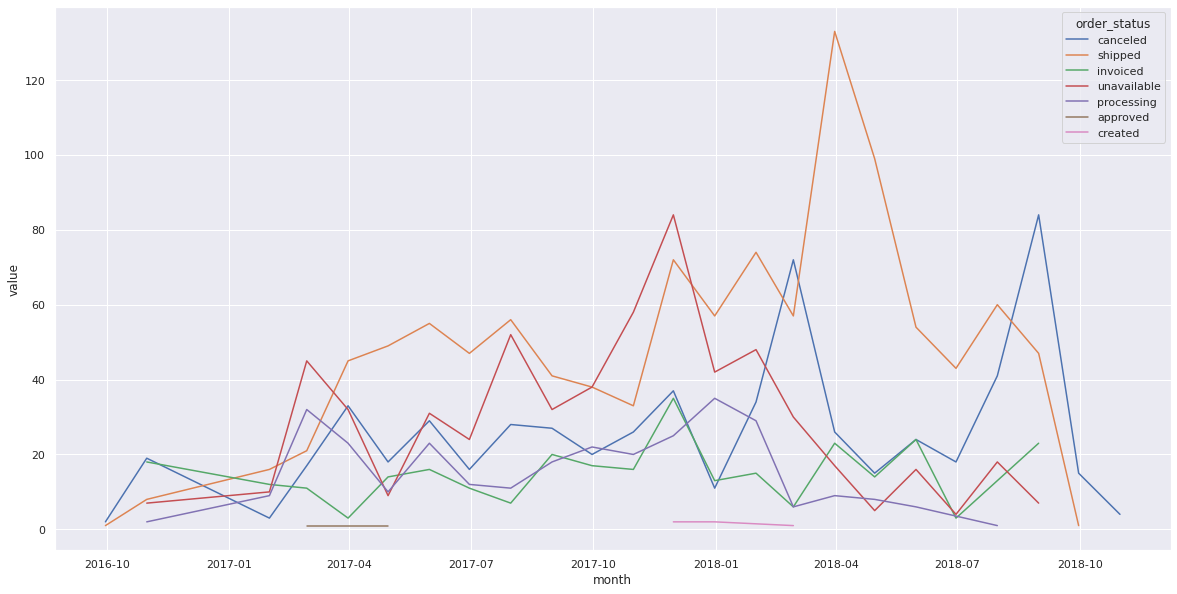

In [27]:
# Визуализируем результат
sns.set(rc={'figure.figsize': (20,10)})
sns.lineplot(x=not_delivered_by_month.month, y=not_delivered_by_month.value, hue=not_delivered_by_month.order_status)

In [28]:
# Среднее количество не доставленных заказов по причинам
not_delivered_by_month.groupby('order_status', as_index=False)\
                      .agg({'value':'mean'})\
                      .round(2)

,order_status,value
0,approved,1.00
1,canceled,25.79
2,created,1.67
3,invoiced,14.95
4,processing,15.84
5,shipped,48.13
6,unavailable,29.00


## 3. По каждому товару определить, в какой день недели товар чаще всего покупается

In [29]:
# Для дальнейших вычислений пересоздадим соединение датафреймов customers и items
customers_items = customers.merge(items)

In [30]:
#Добавим к нашему соединенному датафрейму (customers_items) третий датафрейм. Соеденим по дефолту во избежание лишних пропусков.
all_df = customers_items.merge(orders)
all_df.shape

(112650, 18)

In [31]:
# Проверим количество пропущенных значений

all_df.isna().sum()

# Исходя из нашего изначально принятого правила, что покупкой считается и оплата и подтвержденная доставка, данные 15 товаров
# мы учитывать не будем

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

In [32]:
# Считаем количество уникальных проданных товаров
all_df[all_df.order_approved_at.notna()].query('order_status == "delivered"').product_id.nunique()

32213

In [33]:
# Найдем общее количество проданных товарам за каждый день

week_day_products = all_df[all_df.order_approved_at.notna()] \
                                 .query('order_status == "delivered"') \
                                 .groupby(all_df.order_approved_at.dt.day_name()) \
                                 .agg({'product_id': 'value_counts'}) \
                                 .rename(columns={'product_id': 'product_counts'}) \
                                 .reset_index() \
                                 .rename(columns={'order_approved_at': 'week_day'})

In [34]:
week_day_products

,week_day,product_id,product_counts
0,Friday,aca2eb7d00ea1a7b8ebd4e68314663af,92
1,Friday,422879e10f46682990de24d770e7f83d,87
2,Friday,53759a2ecddad2bb87a079a1f1519f73,68
3,Friday,99a4788cb24856965c36a24e339b6058,66
4,Friday,389d119b48cf3043d311335e499d9c6b,59
...,...,...,...
59831,Wednesday,ffe013e1b4603e3b0b02fbb159d5b400,1
59832,Wednesday,ffe0fc4e02c3559643ac063fa5cf9d07,1
59833,Wednesday,ffe75578163d45caa52bca3529cb511e,1
59834,Wednesday,ffedbd68fa6f44e788ff6c2db8094715,1


In [35]:
# Уникальные коды товаров и их максимальное число покупок
max_products_counts = week_day_products.groupby('product_id', as_index=False).agg({'product_counts':'max'})

In [36]:
max_products_counts

,product_id,product_counts
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,1
4,000d9be29b5207b54e86aa1b1ac54872,1
...,...,...
32208,fff6177642830a9a94a0f2cba5e476d1,1
32209,fff81cc3158d2725c0655ab9ba0f712c,1
32210,fff9553ac224cec9d15d49f5a263411f,1
32211,fffdb2d0ec8d6a61f0a0a0db3f25b441,3


In [37]:
# Итоговый результат
max_week_day_products_counts = week_day_products.merge(max_products_counts)

In [38]:
# Для более читабельного вида (и для красоты) расположим дни согласно недели 
weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
max_week_day_products_counts ['week_day'] = pd.Categorical(max_week_day_products_counts['week_day'], categories=weeks, ordered=True)
max_week_day_products_counts = max_week_day_products_counts.sort_values('week_day')

In [39]:
max_week_day_products_counts

,week_day,product_id,product_counts
14912,Monday,a272b490eba6b022384f14ecb9afc7a9,1
10749,Monday,601d52789faa7ded8408d63ccfcb4800,2
10750,Monday,6171e0ffb665e527d521c2435e065644,2
10751,Monday,627c9ddcab5043db4f8816ce2da1d31c,2
10752,Monday,6291f9025c6b863241bb80ebafa4434e,2
...,...,...,...
23055,Sunday,8a5835aeef83efa6aa947f84f92deb0e,2
23056,Sunday,8b1b115b8dc96bdfa740d4267019a201,2
23058,Sunday,8b6ede776c9602a1db79d27547ff8253,2
23043,Sunday,8374b39a15882a19ce4558f13064b55c,2


### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

Для операций будем использовать объединенный датасет.
Покупкой будет являться оплаченный счет и подтвержденная доставка заказа.
Одной покупкой будет являться один чек.

In [40]:
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [41]:
# Создаем таблицу с группировкой по месяцам и пользователям и считаем для каждого количество покупок 
order_id_to_month = all_df.loc[all_df.order_approved_at.notna()] \
                          .query('order_status == "delivered"') \
                          .groupby([pd.Grouper(key="order_purchase_timestamp", freq="M"), 'customer_unique_id']) \
                          .agg({'order_id': 'count'}) \
                          .rename(columns={'order_id': 'order_count'}) \
                          .reset_index()

In [42]:
# Добавим колонку с количеством недель в каждом месяце
order_id_to_month['week_in_month'] = order_id_to_month.order_purchase_timestamp.dt.daysinmonth / 7

In [43]:
# Добавляим колонку среднего значения количества покупок в неделю
order_id_to_month['mean_in_week'] = order_id_to_month.order_count / order_id_to_month.week_in_month

In [44]:
# Итоговая таблица
order_id_to_month

,order_purchase_timestamp,customer_unique_id,order_count,week_in_month,mean_in_week
0,2016-09-30,830d5b7aaa3b6f1e9ad63703bec97d23,3,4.285714,0.700000
1,2016-10-31,0032c76b20340da25249092a268ce66c,1,4.428571,0.225806
2,2016-10-31,01f156677184504063bd19739f924af1,1,4.428571,0.225806
3,2016-10-31,0636d30c77f0f9cfad81f1c9b58c791f,1,4.428571,0.225806
4,2016-10-31,06bdfbbe1857c3c925ec81abfb1c9666,1,4.428571,0.225806
...,...,...,...,...,...
95175,2018-08-31,ffc39051848c3ef2be36d1513aa3ad17,1,4.428571,0.225806
95176,2018-08-31,ffc4e1cd8aa220763480d0a18157c45d,1,4.428571,0.225806
95177,2018-08-31,ffe204b1bb8026741b839085b2fd10f2,1,4.428571,0.225806
95178,2018-08-31,ffec490ab531184a483efe2eedd68908,1,4.428571,0.225806


In [45]:
# Найдем топ 3 покупателей с наибольшим количеством покупок

top_3_customers = order_id_to_month.groupby('customer_unique_id', as_index=False) \
                                   .agg({'order_purchase_timestamp':'count'}) \
                                   .sort_values(by='order_purchase_timestamp', ascending=False) \
                                   .rename(columns={'order_purchase_timestamp':'count'}) \
                                   .head(3)
top_3_customers

,customer_unique_id,count
51426,8d50f5eadf50201ccdcedfb9e2ac8455,9
87873,f0e310a6839dce9de1638e0fe5ab282a,6
73911,ca77025e7201e3b30c44b472ff346268,6


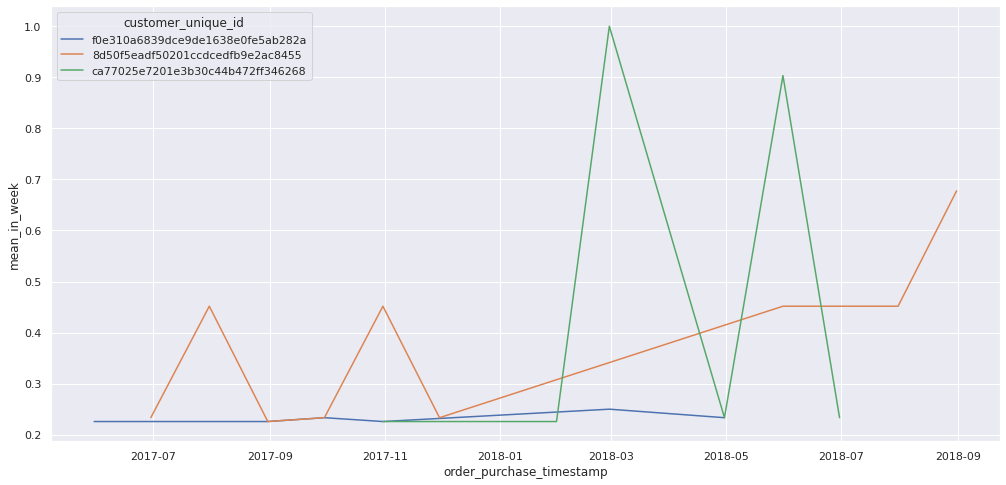

In [46]:
# График распределения среднего значения в неделю по месяцам для трех пользователей с максимальным количеством покупок
sns.set(rc={'figure.figsize': (17, 8)})
sns.lineplot(x='order_purchase_timestamp', y='mean_in_week', data=order_id_to_month.query('customer_unique_id == "8d50f5eadf50201ccdcedfb9e2ac8455" or \
                                                                                           customer_unique_id == "f0e310a6839dce9de1638e0fe5ab282a" or \
                                                                                           customer_unique_id == "ca77025e7201e3b30c44b472ff346268"'), \
                                                                                           hue = 'customer_unique_id')

### 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

- Итак, нам необходимо найти retention, т.е. количество людей которое вернулось за покупкой после совершения первого заказа, тот самый коэффициент удержания.
- В качестве когорты принимаем месяц, в который определенное число пользователей совершило первый заказ.
- После этого рассчитываем какое количество пользователей вернулось за покупкой после совершения первого заказа с периодичностью каждый месяц.

Будем использовать соединенный датасет из 3-го задания

In [47]:
customers_items.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [48]:
# Отберем только индификаторы уникальных пользователей и время создания заказа
purchaes_of_customers = customers_items[['customer_unique_id', 'order_purchase_timestamp']]

In [49]:
# Теперь необходимо перевести колонку с датой создания заказа к году/месяцу
purchaes_of_customers['order_purchase_timestamp'] = purchaes_of_customers.order_purchase_timestamp.dt.to_period('M')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
purchaes_of_customers

,customer_unique_id,order_purchase_timestamp
0,861eff4711a542e4b93843c6dd7febb0,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05
3,259dac757896d24d7702b9acbbff3f3c,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,2018-07
...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,2018-04
99437,d52a67c98be1cf6a5c84435bd38d095d,2018-04
99438,e9f50caf99f032f0bf3c55141f019d99,2018-04
99439,73c2643a0a458b49f58cea58833b192e,2017-11


In [51]:
# Теперь нам необходимо определить когорту. Ею будет первый заказ уникальных пользователей.
first_purchaes = purchaes_of_customers.groupby('customer_unique_id', as_index=False) \
                                      .order_purchase_timestamp.min() \
                                      .rename(columns={'order_purchase_timestamp':'cohort'})

In [52]:
first_purchaes

,customer_unique_id,cohort
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11
...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06
96092,fffea47cd6d3cc0a88bd621562a9d061,2017-12
96093,ffff371b4d645b6ecea244b27531430a,2017-02
96094,ffff5962728ec6157033ef9805bacc48,2018-05


In [53]:
# Соеденим 2 полученных датасета для дальнейших математических действий с датами.
# Переименовываем колонку 'order_purchase_timestamp' из датасета 'purchaes_of_customers' как все даты заказов
cohort = first_purchaes.merge(purchaes_of_customers) \
                       .sort_values('cohort') \
                       .rename(columns={'order_purchase_timestamp':'dates_of_all_orders'})

In [54]:
cohort

,customer_unique_id,cohort,dates_of_all_orders
71517,b7d76e111c89f7ebf14761390f0f7d17,2016-09,2016-09
242,009b0127b727ab0ba422f6d9604487c7,2016-09,2016-09
51027,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,2016-09
28159,4854e9b3feff728c13ee5fc7d1547e92,2016-09,2016-09
72268,b9c47942414b4b3f08a3ae85f5c7e4d7,2016-10,2016-10
...,...,...,...
3698,09687a7b7431a93b5c53b50ba779bf94,2018-09,2018-09
60582,9bb92bebd4cb7511e1a02d5e50bc4655,2018-09,2018-09
4082,0a5dadb73145d29f42f703c97c377ae8,2018-09,2018-09
58501,968fac81e2c44fb6c1e3ac2a45e6a102,2018-09,2018-09


In [55]:
# Теперь можно найти каждого уникального пользователя на каждую дату
df_cohort = cohort.groupby(['cohort', 'dates_of_all_orders'], as_index=False) \
                  .agg({'customer_unique_id':'nunique'})

In [56]:
# Добавbv колонку периода. Это будет разница между всеми датами заказов и первой датой покупки.
# С помощью метода "attrgetter" переводим количество месяцев в целое число.
df_cohort['period'] = (df_cohort.dates_of_all_orders - df_cohort.cohort).apply(attrgetter('n'))

In [57]:
df_cohort

,cohort,dates_of_all_orders,customer_unique_id,period
0,2016-09,2016-09,4,0
1,2016-10,2016-10,321,0
2,2016-10,2017-04,1,6
3,2016-10,2017-07,1,9
4,2016-10,2017-09,1,11
...,...,...,...,...
220,2018-08,2018-08,6271,0
221,2018-08,2018-09,7,1
222,2018-08,2018-10,2,2
223,2018-09,2018-09,5,0


In [58]:
# Развернем нашу таблицу при помощи pivot
pivot_cohorts = df_cohort.pivot(index='cohort', columns='period', values='customer_unique_id')
pivot_cohorts
# Таблица сложно читается, поэтому необходимо придать ей цвета и перевести в проценты для поиска retention

period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,321.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,764.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,1752.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03,2636.0,13.0,10.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04,2352.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN,NaN,NaN
2017-05,3596.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,9.0,12.0,9.0,1.0,7.0,9.0,NaN,NaN,NaN,NaN
2017-06,3139.0,15.0,11.0,13.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN


По заданию требуется в период с января по декабрь указать когорту с самым высоким "retention" на третий месяц.

Выделяем 3 месяц (период) красным цветом.

In [59]:
pivot_cohorts.div(pivot_cohorts.iloc[:,0], axis=0) \
            .style \
            .background_gradient(cmap='Greens') \
            .highlight_max([3], color='red') \
            .highlight_null('white') \
            .format('{:.2%}', na_rep='')
# Привели первую колонку к показателю в 100%.
# Выбрали зеленый цвет тепловой карты.
# Выделили самое высокое значение на карте за 3 месяц (3 колонку) и задали красный цвет.
# Все пустые значения закрасили в белый цвет.
# Значениям в тепловой карте перевели в проценты и оставили 2 знака после запятой, пустые значения убрали.

period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,100.00%,,,,,,,,,,,,,,,,,,,
2016-10,100.00%,,,,,,0.31%,,,0.31%,,0.31%,,0.31%,,0.31%,,0.31%,0.62%,0.62%
2016-12,100.00%,100.00%,,,,,,,,,,,,,,,,,,
2017-01,100.00%,0.39%,0.26%,0.13%,0.39%,0.13%,0.52%,0.13%,0.13%,,0.39%,0.13%,0.79%,0.39%,0.13%,0.13%,0.26%,0.39%,0.13%,
2017-02,100.00%,0.23%,0.29%,0.11%,0.40%,0.11%,0.23%,0.17%,0.17%,0.23%,0.11%,0.29%,0.17%,0.17%,0.11%,0.06%,0.06%,0.23%,,
2017-03,100.00%,0.49%,0.38%,0.38%,0.34%,0.15%,0.15%,0.30%,0.34%,0.08%,0.38%,0.15%,0.23%,0.11%,0.15%,0.23%,0.08%,0.15%,,
2017-04,100.00%,0.60%,0.21%,0.17%,0.34%,0.26%,0.34%,0.30%,0.30%,0.17%,0.26%,0.09%,0.09%,0.04%,0.09%,0.09%,0.21%,,,
2017-05,100.00%,0.50%,0.50%,0.39%,0.31%,0.33%,0.42%,0.17%,0.25%,0.31%,0.25%,0.33%,0.25%,0.03%,0.19%,0.25%,,,,
2017-06,100.00%,0.48%,0.35%,0.41%,0.25%,0.38%,0.38%,0.22%,0.13%,0.22%,0.32%,0.35%,0.16%,0.13%,0.19%,,,,,


### Ответ: 06 июня 2017 года или 2017-06

## 6. Построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

Воспользуемся таблицей объединенния всех датасетов (all_df). Интервалом будет служить весь промежуток времени, т.к. интервал совсем не велик. Фильтровать данные также будем по времени оплаты и статусу доставленного товара.

In [61]:
all_df.loc[all_df.order_approved_at.notna()].query('order_status == "delivered"').head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


**Колонки, которые нам понадобятся:**
- Уникальные пользователи (customer_unique_id),
- Номера заказов (order_id),
- Время создания заказа (order_purchase_timestamp),
- Сумма покупок для каждого заказа (price).

In [63]:
df = all_df.loc[all_df.order_approved_at.notna()] \
           .query('order_status == "delivered"') \
           .groupby(['customer_unique_id', 'order_id', 'order_purchase_timestamp'], as_index=False) \
           .agg({'price':'sum'})

In [68]:
# Теперь нам необходимо установить конечную дату в зависимости от последней покупки
final_day = df.order_purchase_timestamp.max() + timedelta(days=1)
final_day

Timestamp('2018-08-30 15:00:37')

In [69]:
# Найдем дельту времени между первым и последним заказом для того, чтобы установить период
df.order_purchase_timestamp.max() - df.order_purchase_timestamp.min()

Timedelta('713 days 02:43:59')

In [70]:
# Во избежание непопадания пользователей, которые находятся на границе времени укажем период немного больше
period = 714

In [75]:
# Создадим функцию, которая рассчитает разницу между датами
diff_days = lambda x: (final_day - x).days

In [76]:
# Добавим в наш датасет колонку разницы дней и применим функцию
df['days'] = df.order_purchase_timestamp.apply(diff_days)

In [77]:
df

,customer_unique_id,order_id,order_purchase_timestamp,price,days
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 10:56:27,129.90,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 11:11:27,18.90,115
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,69.00,537
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:29:41,25.99,321
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 19:45:42,180.00,288
...,...,...,...,...,...
96459,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08 21:00:36,1570.00,447
96460,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10 20:07:56,64.89,262
96461,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-07 15:49:16,89.90,568
96462,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02 15:17:41,115.00,119


**Данные подготовлены, теперь можно рассчитывать метрики**

"recency" - время от последней покупки пользователя до конечной даты

"frequency" - суммарное количество покупок у пользователя за весь период

"monetary" - сумма покупок у пользователя за весь период

In [80]:
rfm = df.groupby('customer_unique_id') \
        .agg({'days': lambda x: x.min(), \
              'order_purchase_timestamp': lambda x: len([d for d in x if d >= final_day - timedelta(days=period)]), \
              'price': 'sum'}) \
        .reset_index() \
        .rename(columns={'days': 'recency', 'order_purchase_timestamp': 'frequency', 'price': 'monetary'})

In [81]:
rfm

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00
...,...,...,...,...
93340,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,1570.00
93341,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89
93342,ffff371b4d645b6ecea244b27531430a,568,1,89.90
93343,ffff5962728ec6157033ef9805bacc48,119,1,115.00


**Следующим этапом нам предстоит определить границы метрик.**

In [86]:
# frequency
rfm.frequency.value_counts()

1     90544
2      2572
3       181
4        28
5         9
6         5
7         3
15        1
9         1
0         1
Name: frequency, dtype: int64

**Исходя из цифр определим следующие группы:**

1 - совершили одну покупку;  
2 - совершили две покупки;  
3 - совершили более двух покупок.

In [85]:
# monetary
# разобьем затраты на квантили 70-й и 95-й.
# С помощью этого мы найдем границы затрат пользователей
print(rfm.monetary.quantile(0.70))
print(rfm.monetary.quantile(0.95))

139.0
419.84800000000024


**Определим следующие группы:**

1 - потратили до 139 руб. (70% пользователей);  
2 - потратили от 139 до 420 руб. (25% пользователей);  
3 - потратили больше 420 руб. (оставшиеся 5% пользователей)

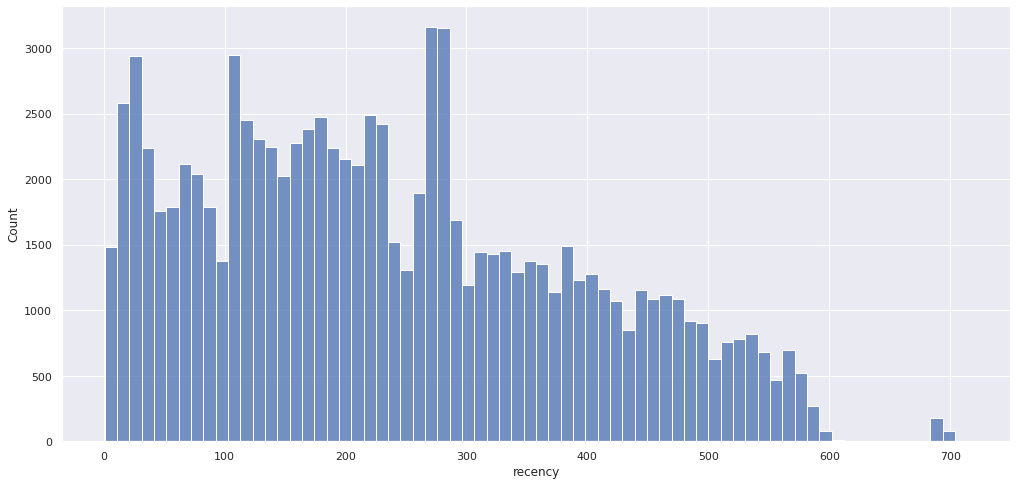

In [92]:
# recency
# Проверим гистограмму распределения
sns.histplot(rfm.recency);

Разобьем также на три примерно равные группы:   

1 - прошло больше 400 дней;  
2 - прошло от 200 до 400 дней;  
3 - прошло до 200 дней.

**Сегментация**

In [93]:
# функция оценки для метрики "recency"
def r_score(x):
    if x <= 200:
        return 3
    elif 200 < x <= 400:
        return 2
    else:
        return 1

In [94]:
# функция оценки для метрики "frequency"
def f_score(x):
    if x > 2:
        return 3
    elif x == 2:
        return 2
    else:
        return 1

In [95]:
# функция оценки для метрики "monetary"
def m_score(x):
    if x >= 420:
        return 3
    elif 420 > x >= 139:
        return 2
    else:
        return 1

In [96]:
# Применяем функции для создания столбцов с оценками
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['monetary'].apply(lambda x: m_score(x))

In [98]:
# Объединяем оценки R, F и M в общую оценку RFM
rfm['RFM'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

In [101]:
# Всего 27 сегментов
rfm.RFM.nunique()

27

In [105]:
# Зададим девять сегментов на основе метрик F и M.
segt_map = {
    r'11': 'Стандарт', # Купил 1 раз
    r'12': 'Заинтересованный', # Вернулся второй раз
    r'13': 'Уникальный/скупой', # Возвращался более двух раз, но оставленная сумму не большая
    r'21': 'Стандартный/денежный', # Пришел один раз, но оставил большую сумму
    r'22': 'Выше среднего', # Вернулся за покупкой и потратил большую сумму
    r'23': 'Уникальный/денежный', # Возвращался более двух раз и оставил большую сумму 
    r'31': 'Стандартный/богатый', # Пришел один раз и оставил огромную сумму
    r'32': 'Заинтересованный богач', # Вернулся за покупкой и потратил огромную сумму
    r'33': 'Уникальный богач!' # Возвращался более двух раз и потратил огромную сумму
}

In [106]:
# Создаем колонку с названием сегмента для каждого уникального пользователя
rfm['segment'] = rfm['M'].map(str) + rfm['F'].map(str)
rfm['segment'] = rfm['segment'].replace(segt_map, regex=True)

In [107]:
rfm

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,3,1,1,311,Стандарт
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,3,1,1,311,Стандарт
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,1,111,Стандарт
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211,Стандарт
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,2,212,Стандартный/денежный
...,...,...,...,...,...,...,...,...,...
93340,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,1570.00,1,1,3,113,Стандартный/богатый
93341,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,2,1,1,211,Стандарт
93342,ffff371b4d645b6ecea244b27531430a,568,1,89.90,1,1,1,111,Стандарт
93343,ffff5962728ec6157033ef9805bacc48,119,1,115.00,3,1,1,311,Стандарт


In [108]:
rfm.segment.value_counts().reset_index()

,index,segment
0,Стандарт,64272
1,Стандартный/денежный,22031
2,Стандартный/богатый,4242
3,Выше среднего,1325
4,Заинтересованный,935
5,Заинтересованный богач,312
6,Уникальный/денежный,103
7,Уникальный богач!,83
8,Уникальный/скупой,42


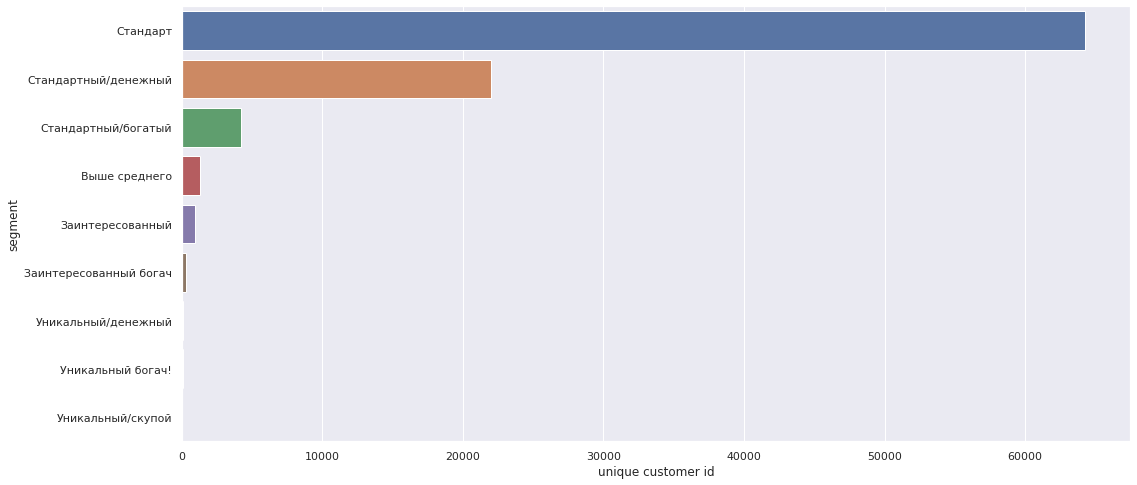

In [109]:
# Визуализация
sns.barplot(x=rfm.segment.value_counts().reset_index()['segment'], y=rfm.segment.value_counts().reset_index()['index'])
plt.xlabel('unique customer id')
plt.ylabel('segment');